# Logistic Regression Assignment 2

### Q1. What is the purpose of grid search cv in machine learning, and how does it work?

Sure! In simple terms, the purpose of GridSearchCV in machine learning is to find the best settings for a model. When we train a model, there are certain settings called hyperparameters that we need to choose. GridSearchCV helps us automatically try out different combinations of these settings and see which one works the best.

How it works?

1. We specify a range of values for each hyperparameter that we want to test. For example, we might want to try different values for the learning rate or the number of hidden layers in a neural network.

2. GridSearchCV then tries out all possible combinations of these values. It trains and evaluates the model with each combination.

3. It uses a technique called cross-validation, which means it splits the training data into different parts and trains the model on some parts while evaluating its performance on the remaining parts. This helps get a better understanding of how the model will perform on unseen data.

4. After trying out all combinations, GridSearchCV compares the performance of the model for each set of hyperparameters. It selects the combination that gives the best performance according to a specified evaluation metric, like accuracy or F1 score.

5. Finally, it retrains the model using the best set of hyperparameters on the entire training dataset. This model is then ready to make predictions on new, unseen data.

In a nutshell, GridSearchCV saves us time and effort by automatically searching through different combinations of hyperparameter settings to find the ones that give the best performance for our model. It helps us optimize our model without having to manually try out each combination one by one.

### Q2. Describe the difference between grid search cv and randomize search cv, and when might you choose one over the other?

GridSearchCV exhaustively searches all combinations of hyperparameters, while RandomizedSearchCV randomly samples a subset. GridSearchCV is suitable for smaller hyperparameter spaces and when computational resources are sufficient. RandomizedSearchCV is more efficient for large hyperparameter spaces and limited resources. GridSearchCV guarantees a thorough search, while RandomizedSearchCV provides a good trade-off between exploration and resources. GridSearchCV is preferred when you want to evaluate all combinations, while RandomizedSearchCV is useful for finding reasonably good hyperparameters.

### Q3. What is data leakage, and why is it a problem in machine learning? Provide an example.

Data leakage refers to the situation where information from outside the training data is unintentionally used to create or evaluate a machine learning model. It is a problem because it can lead to over-optimistic and unreliable model performance estimates. Data leakage can occur in different ways:

1. Train-Test Contamination: This happens when information from the test set is used during the model training phase. For example, if you accidentally include features from the test set in the training data, the model may learn to rely on those features and give inflated performance during evaluation.

2. Target Leakage: Target leakage occurs when information that is directly related to the target variable is included as a feature in the training data. For instance, if you have a classification problem to predict loan defaults and include future payment information that is only available after a loan has been approved, the model will have access to future information that it wouldn't have in real-world scenarios, leading to unrealistic performance estimates.

3. Time-Based Leakage: When dealing with time series data, it is important to respect the temporal order. If you use future data to predict past events, it creates data leakage. For example, using future stock prices to predict past stock performance would be incorrect and lead to overly optimistic results.

Data leakage is a problem because it gives an inaccurate representation of how the model would perform on new, unseen data. It can result in models that seem to perform well in testing but fail to generalize to real-world scenarios. To avoid data leakage, it is crucial to carefully separate training and evaluation data, ensure features are not derived from future information, and be mindful of the order and timing of data in time series problems.

### Q4. How can you prevent data leakage when building a machine learning model?

To prevent data leakage when building a machine learning model:
1. Use holdout validation with separate training, validation, and test sets.
2. Be cautious during feature engineering and avoid using future or target-related  information.
3. Respect the temporal order in time series data and use proper time-based validation techniques.
4. Perform feature selection before model training to exclude leaky features.
5. Apply preprocessing steps within each fold during cross-validation to prevent leakage.
6. Have a strong understanding of the problem domain to identify potential sources of        leakage.
7. Shuffle the data before splitting to ensure randomness in train/validation/test sets.
8. Regularly monitor for potential leakage when making model or dataset updates.
9. Follow established best practices and guidelines for handling sensitive information.
10. Validate data integrity and assess model performance on unseen data.

### Q5. What is a confusion matrix, and what does it tell you about the performance of a classification model?

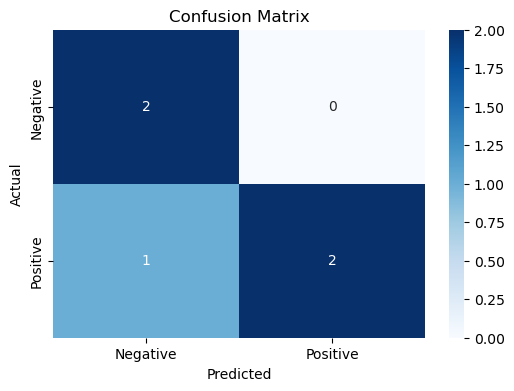

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Replace y_true and y_pred with your actual true and predicted values
y_true = [1, 0, 1, 0, 1]
y_pred = [1, 0, 0, 0, 1]

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Create a DataFrame from the confusion matrix
labels = ['Negative', 'Positive']
df_cm = pd.DataFrame(cm, index=labels, columns=labels)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



Each cell in the confusion matrix represents a specific prediction outcome. Here's what it tells us about the performance of a classification model:

- True Positive (TP): The number of instances correctly predicted as positive by the model.
- True Negative (TN): The number of instances correctly predicted as negative by the model.
- False Positive (FP): The number of instances incorrectly predicted as positive by the model (Type I error).
- False Negative (FN): The number of instances incorrectly predicted as negative by the model (Type II error).

By examining the values in the confusion matrix, we can derive various performance metrics that indicate the model's performance, such as accuracy, precision, recall, specificity, and F1-score. The confusion matrix helps us assess the model's accuracy and identify any patterns or issues in its predictions.

### Q6. Explain the difference between precision and recall in the context of a confusion matrix.

Certainly! Here's an improved version of the table that better distinguishes precision and recall:

| Metric     | Calculation                          | Focus                     |
|------------|--------------------------------------|---------------------------|
| Precision  | TP / (TP + FP)                       | Accuracy of positive predictions |
| Recall     | TP / (TP + FN)                       | Ability to capture all positive instances |

Precision measures the accuracy of positive predictions by calculating the proportion of correctly predicted positive instances out of all instances predicted as positive. It emphasizes the precision and correctness of positive classifications. Precision is useful when the cost of false positives is high, as it helps minimize false alarms and ensure that positive predictions are reliable and accurate.

On the other hand, recall evaluates the ability to capture all positive instances by determining the proportion of correctly predicted positive instances out of all actual positive instances. It focuses on minimizing false negatives and ensures that the model identifies as many positive instances as possible. Recall is particularly valuable when the cost of false negatives is high, as it helps avoid missing critical positive cases.

Both precision and recall provide essential insights into the performance of a classification model. Depending on the specific problem and its associated costs or priorities, you may prioritize precision or recall. For example, in a spam email classification task, high precision is important to avoid classifying legitimate emails as spam, while high recall is crucial to prevent missing any actual spam emails.

### Q7. How can you interpret a confusion matrix to determine which types of errors your model is making?

We can interpret the confusion matrix to determine the types of errors made by your model:

True Positives (TP): It represents the number of positive instances that are correctly predicted as positive. These are the cases where your model correctly identifies the positive class.

False Negatives (FN): It represents the number of positive instances that are incorrectly predicted as negative. These are the cases where your model fails to identify the positive class.

False Positives (FP): It represents the number of negative instances that are incorrectly predicted as positive. These are the cases where your model wrongly predicts the positive class.

True Negatives (TN): It represents the number of negative instances that are correctly predicted as negative. These are the cases where your model correctly identifies the negative class.

To interpret the types of errors:

Type I Error or False Positive (FP): These errors occur when the model predicts a positive class when the actual class is negative. False positives represent instances that are wrongly classified as positive. For example, in a medical diagnosis scenario, this could be a healthy patient being classified as having a disease.

Type II Error or False Negative (FN): These errors occur when the model predicts a negative class when the actual class is positive. False negatives represent instances that are wrongly classified as negative. For example, in a medical diagnosis scenario, this could be a sick patient being classified as healthy.

Understanding the distribution of these errors is crucial to assess the model's performance and identify areas for improvement. By analyzing the confusion matrix, you can gain insights into which types of errors your model is making and determine strategies to address those errors, such as adjusting the model's threshold or incorporating additional features.

### Q8. What are some common metrics that can be derived from a confusion matrix, and how are they calculated?

Several common metrics can be derived from a confusion matrix to evaluate the performance of a classification model. Here are some of the key metrics and how they are calculated:

1. **Accuracy**: Accuracy is a widely used metric that measures the overall correctness of the model's predictions.

   Accuracy = (TP + TN) / (TP + TN + FP + FN)

   It represents the ratio of correctly predicted instances (both positive and negative) to the total number of instances.

2. **Precision**: Precision quantifies the ability of the model to correctly predict positive instances.

   Precision = TP / (TP + FP)

   It calculates the ratio of true positives to the total number of instances predicted as positive. Precision focuses on the proportion of correctly predicted positive instances among all instances predicted as positive.

3. **Recall (Sensitivity or True Positive Rate)**: Recall measures the model's ability to correctly identify positive instances.

   Recall = TP / (TP + FN)

   It calculates the ratio of true positives to the total number of actual positive instances. Recall provides insight into how well the model captures positive instances from the entire dataset.

4. **Specificity (True Negative Rate)**: Specificity measures the model's ability to correctly identify negative instances.

   Specificity = TN / (TN + FP)

   It calculates the ratio of true negatives to the total number of actual negative instances. Specificity focuses on the proportion of correctly predicted negative instances among all instances predicted as negative.

5. **F1 Score**: The F1 score is a harmonic mean of precision and recall, providing a balanced measure of a model's performance.

   F1 Score = 2 * (Precision * Recall) / (Precision + Recall)

   It combines precision and recall into a single metric, considering both the ability to correctly predict positive instances and capture all actual positive instances.


   It calculates the ratio of false positives to the total number of actual negative instances.


### Q9. What is the relationship between the accuracy of a model and the values in its confusion matrix?

Accuracy is influenced by the distribution of correct and incorrect predictions in the confusion matrix. A higher proportion of true positives and true negatives relative to false positives and false negatives leads to a higher accuracy, while a higher proportion of false positives and false negatives leads to a lower accuracy. The confusion matrix provides a detailed breakdown of these values, helping us understand the performance of the model in more depth.

### Q10. How can you use a confusion matrix to identify potential biases or limitations in your machine learning model?

A confusion matrix can help identify biases or limitations in a machine learning model by examining class imbalances, misclassification patterns, disparate error rates, domain-specific biases, and trade-offs between false positives and false negatives. Analyzing the matrix allows for addressing biases, collecting more representative data, refining features, or employing fairness-aware techniques to improve model performance.

### The End